# Practical Exam: Supermarket Loyalty

International Essentials is an international supermarket chain.

Shoppers at their supermarkets can sign up for a loyalty program that provides rewards each year to customers based on their spending. The more you spend the bigger the rewards. 

The supermarket would like to be able to predict the likely amount customers in the program will spend, so they can estimate the cost of the rewards. 

This will help them to predict the likely profit at the end of the year.

## Data

The dataset contains records of customers for their last full year of the loyalty program.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|customer_id | Unique identifier for the customer. </br>Missing values are not possible due to the database structure. |
|spend | Continuous. </br>The total spend of the customer in their last full year. This can be any positive value to two decimal places. </br>Missing values should be replaced with 0. |
|first_month | Continuous. </br>The amount spent by the customer in their first month of the year. This can be any positive value, rounded to two decimal places. </br>Missing values should be replaced with 0. |
| items_in_first_month | Discrete. </br>The number of items purchased in the first month. Any integer value greater than or equal to zero. </br>Missing values should be replaced by 0. |  
| region | Nominal. </br>The geographic region that the customer is based in. One of four values Americas, Asia/Pacific, Europe, Middle East/Africa. </br>Missing values should be replaced with "Unknown". |
| loyalty_years | Oridinal. </br>The number of years the customer has been a part of the loyalty program. One of five ordered categories, '0-1', '1-3', '3-5', '5-10', '10+'. </br>Missing values should be replaced with '0-1'.|
| joining_month | Nominal. </br>The month the customer joined the loyalty program. One of 12 values "Jan", "Feb", "Mar", "Apr", etc. </br>Missing values should be replaced with "Unknown".|
| promotion | Nominal. </br>Did the customer join the loyalty program as part of a promotion? Either 'Yes' or 'No'. </br>Missing values should be replaced with 'No'.|


# Task 1

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "loyalty.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|customer_id | Unique identifier for the customer. </br>Missing values are not possible due to the database structure. |
|spend | Continuous. </br>The total spend of the customer in their last full year. This can be any positive value to two decimal places. </br>Missing values should be replaced with 0. |
|first_month | Continuous. </br>The amount spent by the customer in their first month of the year. This can be any positive value, rounded to two decimal places. </br>Missing values should be replaced with 0. |
| items_in_first_month | Discrete. </br>The number of items purchased in the first month. Any integer value greater than or equal to zero. </br>Missing values should be replaced by 0. |  
| region | Nominal. </br>The geographic region that the customer is based in. One of four values Americas, Asia/Pacific, Europe, Middle East/Africa. </br>Missing values should be replaced with "Unknown". |
| loyalty_years | Oridinal. </br>The number of years the customer has been a part of the loyalty program. One of five ordered categories, '0-1', '1-3', '3-5', '5-10', '10+'. </br>Missing values should be replaced with '0-1'.|
| joining_month | Nominal. </br>The month the customer joined the loyalty program. One of 12 values "Jan", "Feb", "Mar", "Apr", etc. </br>Missing values should be replaced with "Unknown".|
| promotion | Nominal. </br>Did the customer join the loyalty program as part of a promotion? Either 'Yes' or 'No'. </br>Missing values should be replaced with 'No'.|

<AxesSubplot: >

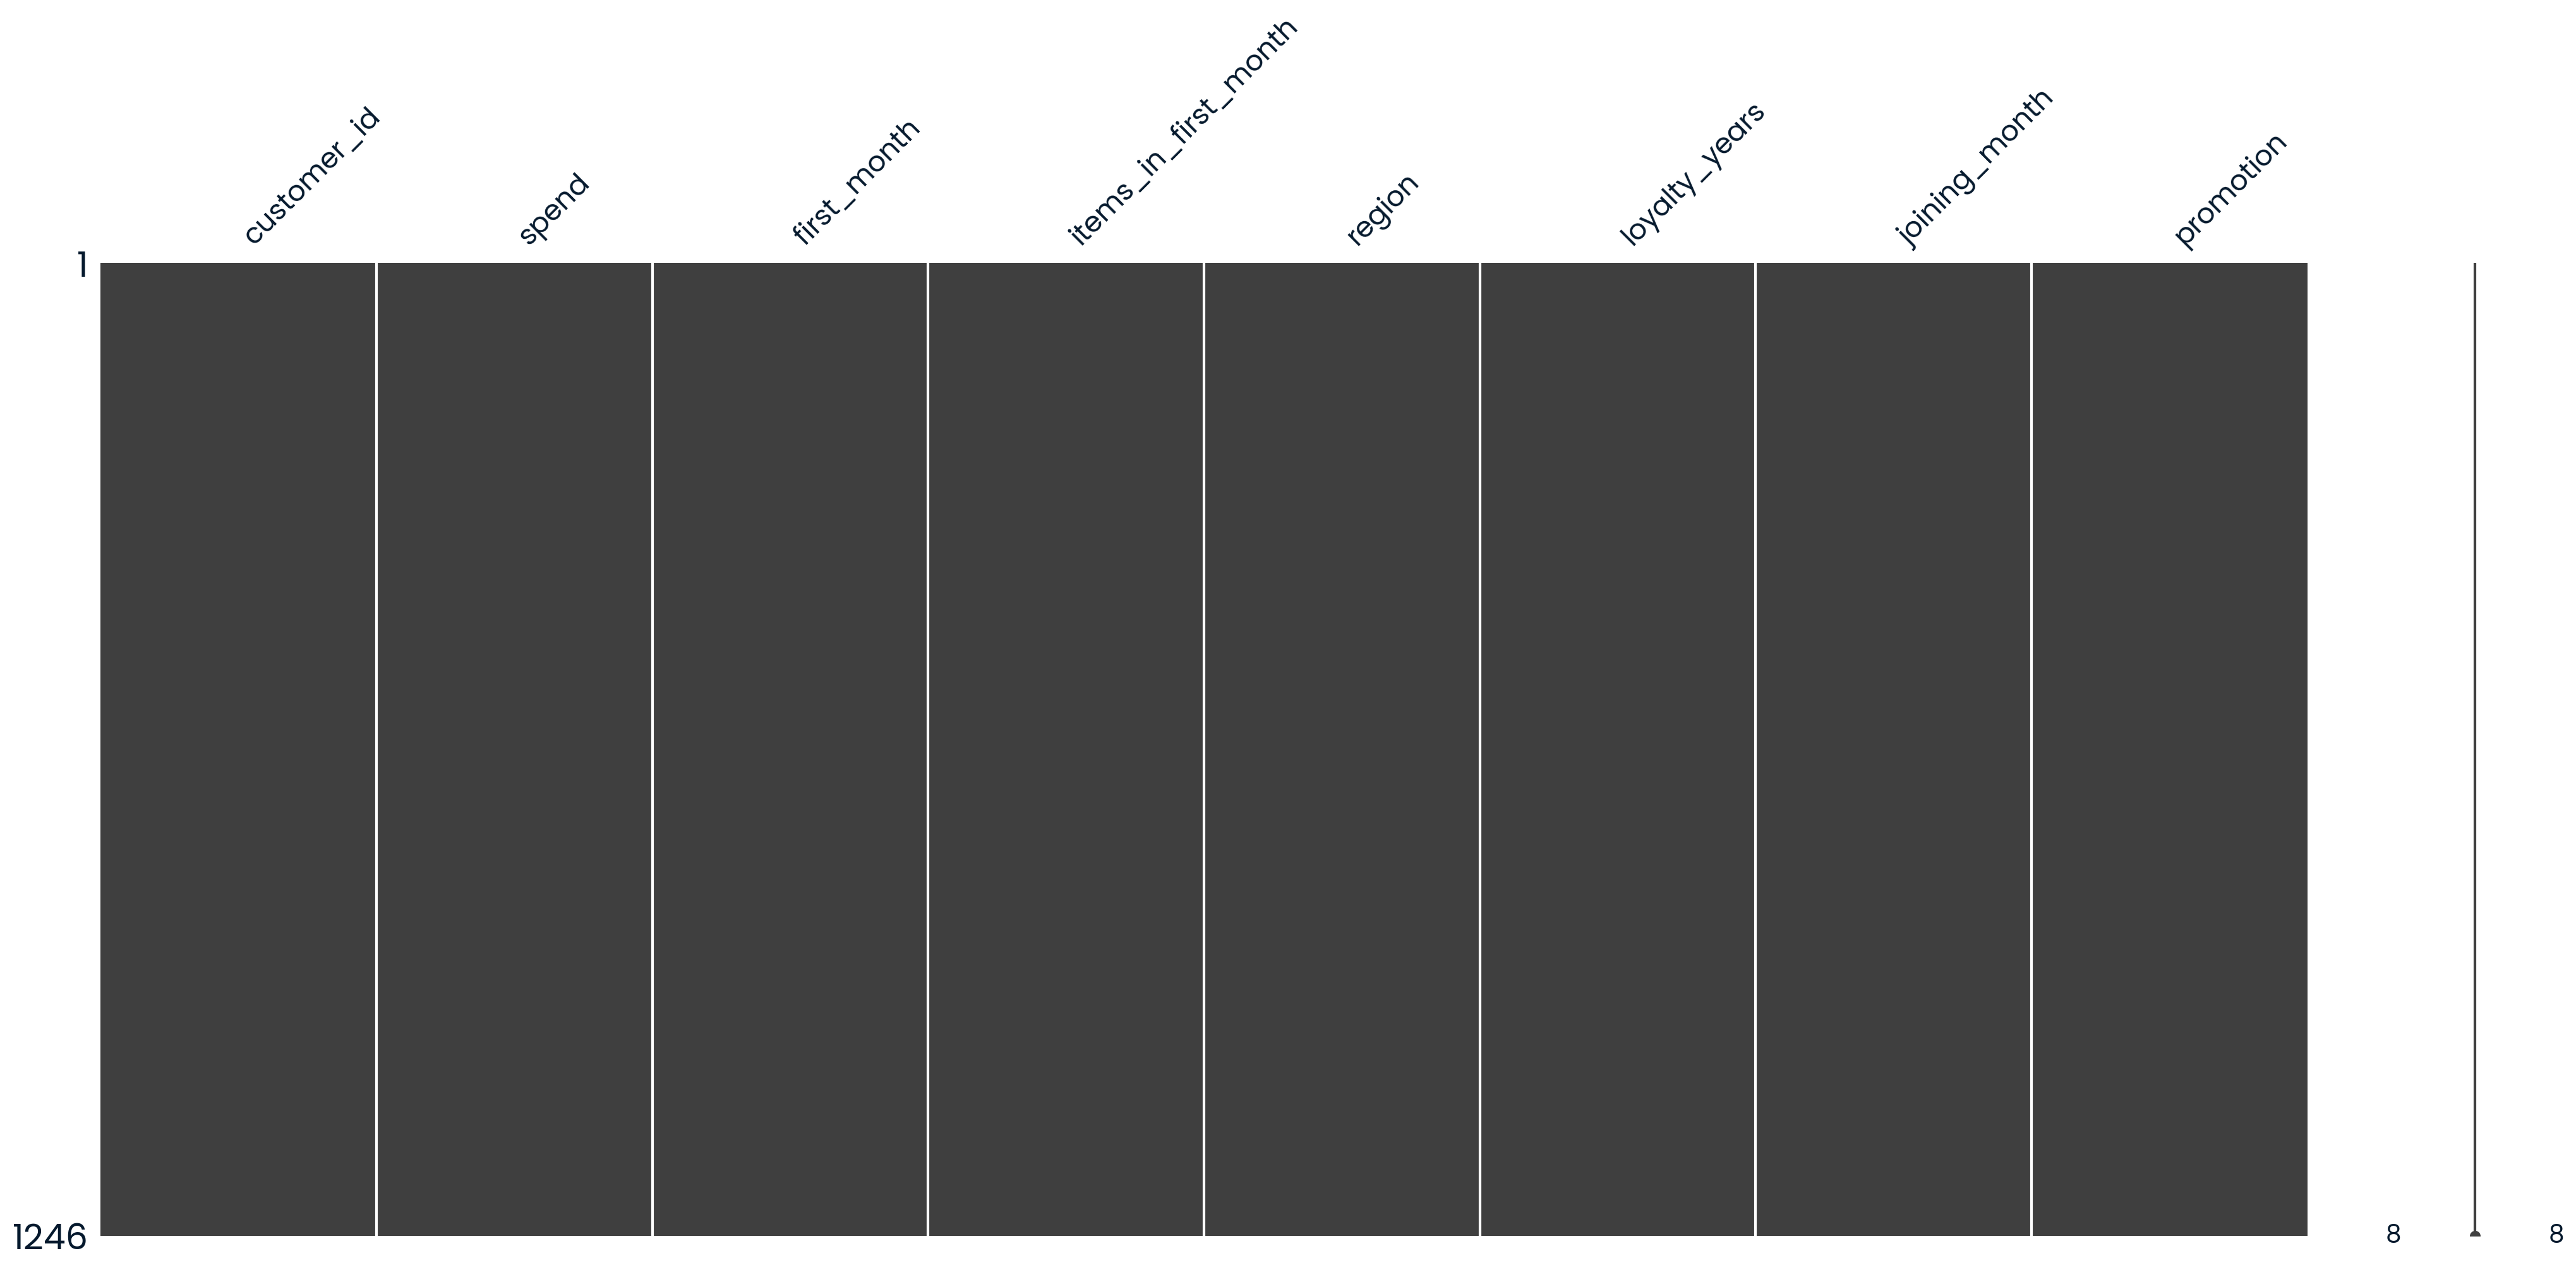

In [203]:
import pandas as pd
import missingno as msno
from datetime import datetime
loyalty_df = pd.read_csv('loyalty.csv')

# 125 rows in joining_month -> more than 5%
# Category colums

## Float
loyalty_df['spend'] = pd.to_numeric(loyalty_df['spend'], errors='coerce').fillna(0).round(2)
loyalty_df['spend'] = loyalty_df['spend'].where(loyalty_df['spend'] >= 0, 0)

loyalty_df['first_month'] = pd.to_numeric(loyalty_df['first_month'], errors='coerce').fillna(0).round(2)
loyalty_df['first_month'] = loyalty_df['first_month'].where(loyalty_df['spend'] >= 0, 0)

# ## Int
loyalty_df['items_in_first_month'] = pd.to_numeric(loyalty_df['items_in_first_month'], errors='coerce').fillna(0).astype('int64')
loyalty_df['items_in_first_month'] = loyalty_df['items_in_first_month'].where(loyalty_df['spend'] >= 0, 0)

## Nominal - Category

loyalty_df["region"] = (
    loyalty_df["region"].astype("category")
    .cat.add_categories('Unknown').fillna('Unknown'))

loyalty_df["joining_month"] = (
    loyalty_df["joining_month"].astype("category")
    .cat.add_categories('Unknown').fillna('Unknown'))

loyalty_df["promotion"] = (
    loyalty_df["promotion"].astype("category").fillna('No'))

# map to 2 categories
mapping = {
    'Yes': 'Yes',
    'YES': 'Yes',
    'NO': 'No',
    'No': 'No',
}

loyalty_df['promotion'] = loyalty_df['promotion'].replace(mapping)

## Ordinal - Category
loyalty_years = pd.CategoricalDtype(['0-1', '1-3', '3-5', '5-10', '10+'], ordered=True)

loyalty_df["loyalty_years"] = loyalty_df["loyalty_years"].astype(loyalty_years).fillna('0-1')

clean_data = loyalty_df
msno.matrix(clean_data)


# Task 2 

The team at International Essentials have told you that they have always believed that the number of years in the loyalty scheme is the biggest driver of spend. 

Producing a table showing the difference in the average spend by number of years in the loyalty programme along with the variance to investigate this question for the team.

 - You should start with the data in the file 'loyalty.csv'.

 - Your output should be a data frame named `spend_by_years`. 

 - It should include the three columns `loyalty_years`, `avg_spend`, `var_spend`. 

 - Your answers should be rounded to 2 decimal places.   

In [204]:
loyalty_df2 = pd.read_csv('loyalty.csv')

spend_by_years = loyalty_df2.groupby('loyalty_years').agg(
    avg_spend=('spend', 'mean'), 
    var_spend=('spend', 'var')
).round(2)
spend_by_years.head()

,avg_spend,var_spend
loyalty_years,,
0-1,110.56,9.30
1-3,129.31,9.65
10+,117.41,16.72
3-5,124.55,11.09
5-10,135.15,14.10


# Task 3

Fit a baseline model to predict the spend over the year for each customer.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “test.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `customer_id` and `spend`. The `spend` column must be your predicted values.

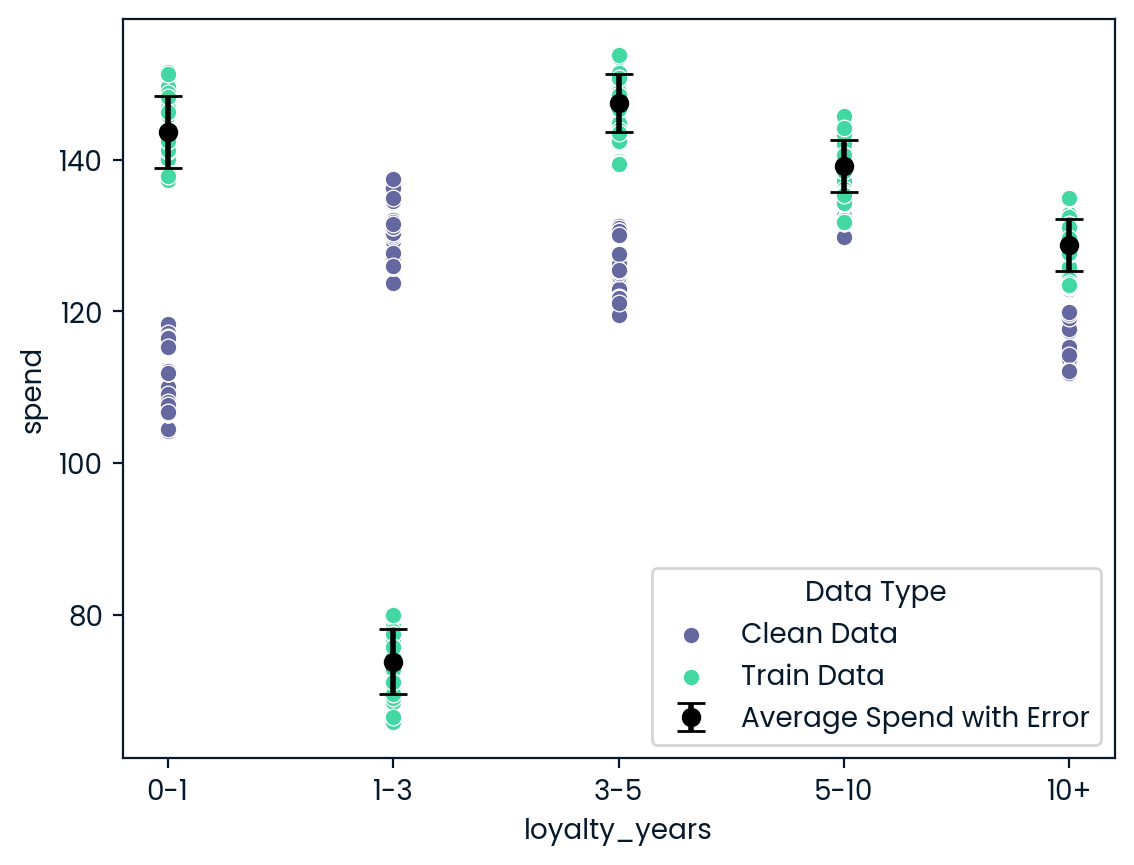

,customer_id,spend,first_month,items_in_first_month,promotion,1-3,10+,3-5,5-10,Asia/Pacific,Europe,Middle East/Africa,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,135.39,15.44,10,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,129.74,20.12,12,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,138.61,18.38,5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,4,129.94,20.13,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,77.56,23.04,10,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [205]:
# Data is clean

import matplotlib.pyplot as plt
import seaborn as sns

def dumify_data(df, column_list):
    
    for column in column_list:
        # Create dummy variables for each categorical column and drop the original column
        df_dummies_column = pd.get_dummies(df[column], drop_first = True) 
        df = df.drop([column], axis=1)
        df = pd.concat([df, df_dummies_column], axis=1)

    # map promotion into 1/0
    if 'promotion' in df.columns:
        df['promotion'] = df['promotion'].replace({'Yes': 1, 'No': 0})    
    
        
    return df


train_df = pd.read_csv("train.csv")
train_df.head()

spend_by_years_train = train_df.groupby('loyalty_years')['spend'].agg(avg_spend='mean',   
                                                                              std_spend='std').round(2)
spend_by_years_train = spend_by_years_train.reset_index()

loyalty_years_train = pd.CategoricalDtype(['0-1', '1-3', '3-5', '5-10', '10+'], ordered=True)
ly_df_graph = pd.DataFrame()
ly_df_graph["loyalty_years"] = train_df["loyalty_years"].astype(loyalty_years_train).fillna('0-1')
ly_df_graph['spend'] = train_df['spend']

sns.scatterplot(data = clean_data, x = 'loyalty_years', y = 'spend', label='Clean Data')
sns.scatterplot(data = ly_df_graph, x = 'loyalty_years', y = 'spend', label='Train Data')

plt.errorbar(spend_by_years_train['loyalty_years'], spend_by_years_train['avg_spend'], 
             yerr=spend_by_years_train['std_spend'], fmt='o', color='black', 
             elinewidth=2, capsize=5, label='Average Spend with Error')

plt.legend(title='Data Type')
plt.show()

catergory_list = ['loyalty_years', 'region', 'joining_month']
train_df = dumify_data(train_df,catergory_list)

train_df.head()

In [206]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

SEED = 9

def format_data_to_model(df):
    X_df = df.drop(['spend'], axis=1)
    y_df = df['spend']

    X_train, X_test, y_train, y_test = train_test_split(X_df,
                                       y_df,
                                       test_size = 0.2, # size of test data
                                       random_state = SEED)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = format_data_to_model(train_df)
reg = LinearRegression()
reg.fit(X_train,y_train)

df_test = pd.read_csv("test.csv")
df_test = dumify_data(df_test, catergory_list)
df_test.head()

y_pred = reg.predict(df_test)

# mse_reg = MSE(df_test,y_pred)
# rmse_reg = np.sqrt(mse_reg)
# print(rmse_reg)

base_result = pd.DataFrame({
    'customer_id': df_test.index,  # customer_id is stored in the index of y_test
    'spend': y_pred })  # Predicted spend values from the model

base_result.set_index('customer_id', inplace=True)
base_result.head()


,spend
customer_id,
0,140.718786
1,148.739205
2,140.793407
3,150.677116
4,153.659976


# Task 4

Fit a comparison model to predict the spend over the year for each customer.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “test.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `customer_id` and `spend`. The `spend` column must be your predicted values.

In [207]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 6, 7, 8],  # Depth of the tree
    'min_samples_leaf': [0.02, 0.04, 0.06],  # Minimum samples per leaf
}

rf = RandomForestRegressor(random_state=SEED)
grid_rf = GridSearchCV(estimator = rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       n_jobs=-1,
                       verbose=1)

grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(df_test)

compare_result = pd.DataFrame({
    'customer_id': df_test.index,  # customer_id is stored in the index of y_test
    'spend': y_pred_rf })  # Predicted spend values from the model

compare_result.set_index('customer_id', inplace=True)

best_hyperparams = grid_dt.best_params_
best_CV_score = grid_dt.best_score_

best_model = grid_dt.best_estimator_
best_rmse = np.sqrt(-best_CV_score)

print("Best Hyperparameters:", best_model)
print("Best RMSE Score:", best_rmse)
compare_result.head()


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Hyperparameters: DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=0.04,
                      random_state=9)
Best RMSE Score: 1.3471147988336274


,spend
customer_id,
0,140.672310
1,148.948398
2,139.602592
3,150.461195
4,152.395674
